# PCA  and Logistic Regression

- Implementation of the covariance matrix and eigendecomposition in a custom PCA class
- Prepare MNIST data for training: train/test-split and normalization of the dataset
- Implement logistic regression with [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression) and validate its accuracy

# Imports

In [9]:
# standard imports
import numpy as np
import pandas as pd
import math

# sklearn
import sklearn
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# other useful imports
from importlib import reload
from time import time

# imports for plotting
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings(action='ignore')

# custom import
import CustomPCA as CustomPCA
import plotting as pl

# Covariance Matrix

The covariance matrix is made up of the variances of the variables along the main diagonal and the covariances between each pair of variables in the remaining matrix places. The mean vector is made up of the means of each variable.
<br>
$$
\Sigma = \begin{bmatrix}
Var(x_1) & Cov(x_1, x_2) & \cdots & Cov(x_1, x_n) \\
Cov(x_2, x_1) & Var(x_2) & \cdots & Cov(x_2, x_n) \\
\vdots & \vdots & \ddots & \vdots \\
Cov(x_n, x_1) & Cov(x_n, x_2) & \cdots & Var(x_n)
\end{bmatrix}
$$

where the sample varaince is given by
$$
\
Var(x) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
\
$$ 
and the data covariance, measuring how much two variables vary together, is: 

$$
\mathrm{Cov(x,y)}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{n-1}
$$
where x_i and y_i are the  ith observations from  the samples of x and  y,  $\tilde{x}$ and $\tilde{y}$ are standing for the means of $X$ and $Y$, respectively. \bar{x} and \bar{y} are the sample means of X and Y, and n is the sample size.

Covariance matrix is always a **square**, **symmetrtic**, **positive semi-definite**


In [11]:
np.random.seed(42)
matrix = np.matrix([np.linspace(3.9, 4.3, num=5), np.linspace(2.0, 2.3, num=5),np.linspace(0.5, 0.6, num=5)]).round(2).T
matrix

array([[3.9 , 2.  , 0.5 ],
       [4.  , 2.08, 0.52],
       [4.1 , 2.15, 0.55],
       [4.2 , 2.22, 0.57],
       [4.3 , 2.3 , 0.6 ]])

In [12]:
cov_matrix = np.cov(matrix, rowvar=False)
mean_vec = np.mean(matrix, axis=0)
print('Mean Vector: \n', mean_vec)
print('\n Covariance Matrix: \n', cov_matrix.round(5))

Mean Vector: 
 [4.1   2.15  0.548]

 Covariance Matrix: 
 [[0.025   0.0185  0.00625]
 [0.0185  0.0137  0.00462]
 [0.00625 0.00462 0.00157]]


# Computing Eigenvalues and Eigenvectors

There exist different methods to compute the <b>eigenvalues</b> and <b>eigenvectors</b>. One could use the [QR Decomposition](https://en.wikipedia.org/wiki/QR_decomposition) and to achieve this, we would then rely on methods such as the [Householder reflection](https://en.wikipedia.org/wiki/Householder_transformation). In short, a Householder reflection is a linear transformation $P:R^{n}$ → $R^{n} $ that reflects a vector $x$ about a hyperplane. Furthermore, the Householder reflection is known to be more numerically stable then its alternative, the [Gramm-Schmidt method](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process#:~:text=In%20mathematics%2C%20particularly%20linear%20algebra,with%20the%20standard%20inner%20product.), which suffers from subtractive cancellation. With the Householder reflection we get a upper triangular matrices, which is quite nice.

Or we could use [sigular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD), which is, by the way, the way `sklearn` computes the values needed for its `PCA` implementation. SVD will give us diagonal matrices, which are better than triangular ones. Furthrmore, the beauty of SVD is that it is always numerically stable for any matrix. However, SVD is more computationally intensive than other decomposition methods.  


## PCA  with custom class

The custom class `CustomPCA` implements the covariance matrix  with numpy.cov and finding eigenvalues and eigeigenvector,  with numpy.linalg of the data. 

## Testing Data

In [14]:
# create testing data, example taken from sklearn.decomposition.PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

## Run Custom PCA

In [15]:
# create an instance of our custom PCA
pca_custom = CustomPCA.CustomPCA(n_components=2)
eigenvalues, eigenvectors = pca_custom.fit(X)

PCA(n_components=2)


In [19]:
print(f"CustomPCA computed  eignevalues: {eigenvalues}")
print(f"CustomPCA computed eigenvectors: {eigenvectors}")

eignevalues: [7.93954312 0.06045688]
eigenvectors: [[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


## Run scikit-learn PCA

Sckit-learns PCA computation consist in the following steps computinng:
- zero mean features matrix $X$
- Covariance matrix $X^T X$ = $D \Lambda D^T$, where  $D$ is the  matrix of  eigenvectors  and  $\Lambda$ is a  diagonal  matrix  of eigenvalues
- Egenvalue decomposition of the covariance matrix
- k largest eigencalues
- Pirncipal components are the eigenvectors coresponding to thek largest eigenvalues

In [20]:
pca_sklearn = PCA(n_components=2)
pca_sklearn.fit(X)

PCA(n_components=2)

## Compare results

In [21]:
# get the variance explained by both algorithms
explained_var_custom = pca_custom.variance_explained
explained_var_sklearn = pca_sklearn.explained_variance_ratio_

In [22]:
# check if the values are equal
assert(np.allclose(explained_var_custom,explained_var_sklearn))

In [23]:
# print the results
print('Custom variance explained: \t', explained_var_custom)
print('sklearn variance explained: \t',explained_var_sklearn)

Custom variance explained: 	 [0.99244289 0.00755711]
sklearn variance explained: 	 [0.99244289 0.00755711]


----

# MNIST Dataset and Logistic Regression

## Loading the Dataset

Download the dataset, via [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html?highlight=mnist).

In [24]:
# important: as_frame needs to be set as False otherwise we would get a data frame
# and would have to convert the dataset to numpy arrays later on
mnist = fetch_openml('mnist_784', data_home='data/', as_frame=False)

## Exploratory Data Analysis

### Check the Shapes 

In [30]:
# the dataset is split into the images and the labels, values between 0 and 255 for images
print('Images shape: ', mnist.data.shape)
print('Images range: ', mnist.data.min(), ' - ', mnist.data.max(), 'pixel')
print('Labels shape: ', mnist.target.shape)

Images shape:  (70000, 784)
Images range:  0.0  -  255.0 pixel
Labels shape:  (70000,)


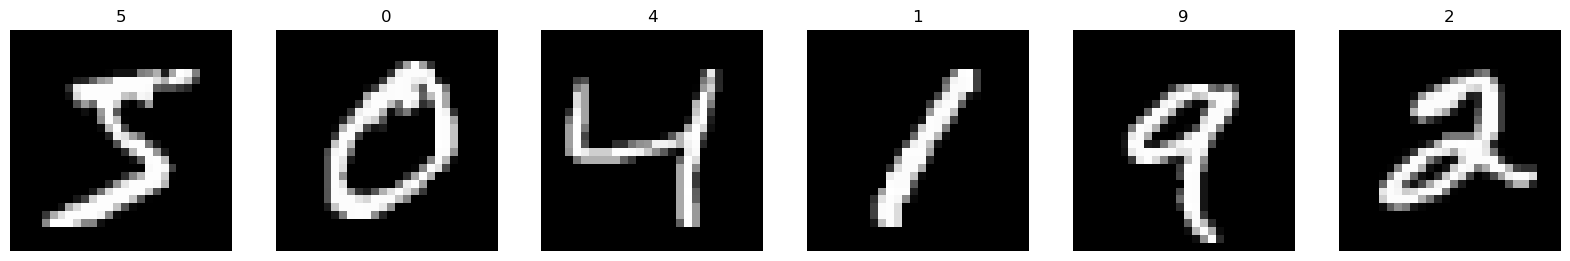

In [39]:
import matplotlib.pyplot as plt

# reshape in 2D 
images = mnist.data.reshape(-1, 28, 28)
# plot the first 6 images with matplotlib
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(mnist.target[i])
    plt.axis('off')
plt.show()


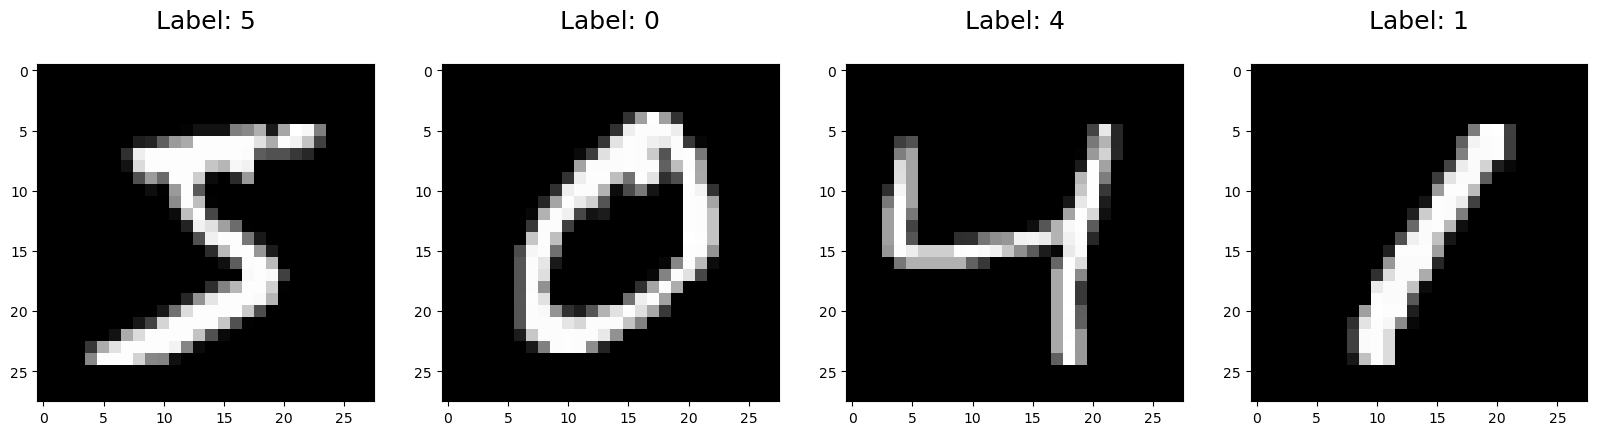

In [37]:
# plot with custom function
pl.show_images(images, mnist.target)

<b>Note: The shape of the images is `(70000, 784)` this is because the data is in $2D$. If we want to plot the images, we need to reshape them into  $3D$, which then is: `(70000, 28, 28)`.</b>

## Prepare Data for Training

### Split into Training and Test Set

In [33]:
# split the data into a testing set
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

In [34]:
# check the split
assert((mnist.data.shape[0]*0.8) == (x_train.shape[0]))
assert((mnist.data.shape[0]*0.2) == (x_test.shape[0]))

# check the split
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (56000, 784)
y_train: (56000,)
x_test:  (14000, 784)
y_test:  (14000,)


### Plot Images and Labels

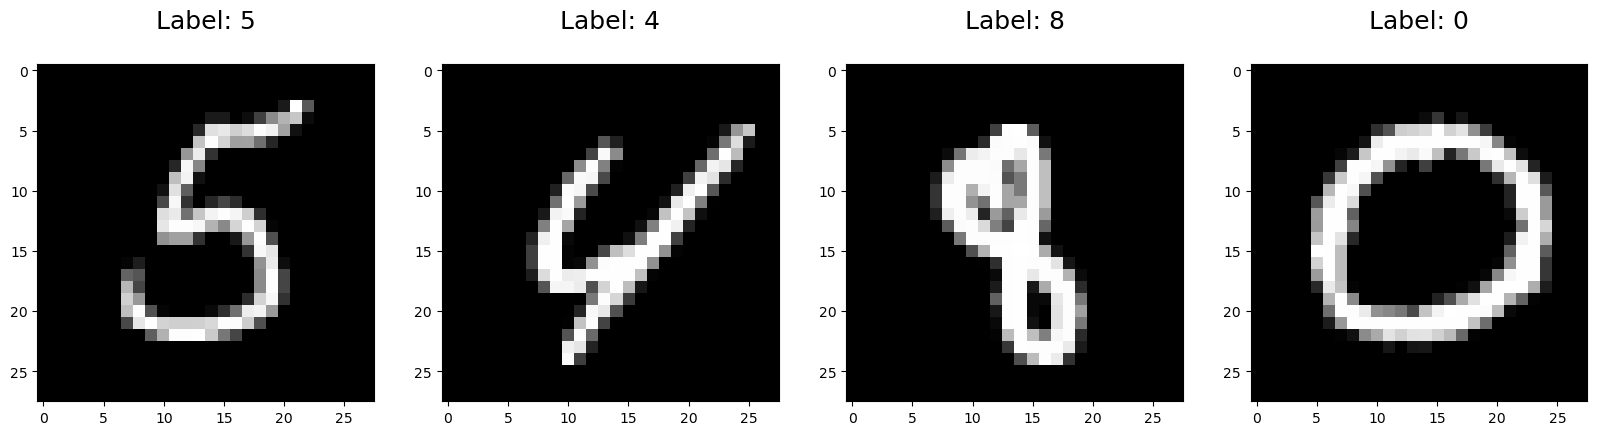

In [35]:
pl.show_images(x_train, y_train)

In [38]:
# This is how the image of number 7 looks to the algorithm - 0 indicates black pixels; 255 indicates white pixels)
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  26. 255.  90.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  26.  26.   0.  13.  64. 138. 180. 199.  11.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  41.
 224. 232. 207. 221. 253. 242. 162.  17.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 195.
 253. 210. 160. 161. 111.  38.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

### Normalizing the Dataset

To normalize the dataset we use the following approach:
<br>
<br>
<font size="5">
$$
z_{i}=\frac{x_{i}-\min (x)}{\max (x)-\min (x)},
$$ </font>

where $x_{i}=(x_{1}, ..., x_{n})$ entry of the dataset and $z_{i}$ is our $i^{th}$ entry of the normalized data.
<br>

In [40]:
# normalize the data by scaling it to a range between 0 and 1; can also normalize  by  dividing by 255
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

## Model

Use [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression) from `scikit learn` to classify the images witout any modification via PCA and evaluate its [prediction accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [41]:
start = time()

# use the ‘lbfgs’ solver for multiclass problem

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)

end = time()

running_time = end-start
print('Time to fit: {}s'.format(running_time))

Time to fit: 56.83612012863159s


## Predictions and  Model Evaluation

In [44]:
#Make the prediction with your model and check your accuracy by using the accuracy_score from sklearn.metrics 

# get the predictions of trainig set
y_preds_train =  model.predict(x_train)

# get the predictions of testing set
y_preds_test = model.predict(x_test)

# compute the accuracy of training and testing to see how it degrades between the two
model_score_train = model.score(x_train, y_train)
model_score_test = model.score(x_test, y_test)

# Evaluation
print('Training Set Score: {}'.format(model_score_train.round(4)))
print('Test Set Score: {}'.format(model_score_test.round(4)))

Training Set Score: 0.9397
Test Set Score: 0.9208
